# **CNN assignment**(Do read the note at the end)

Description: Here we are going to use CNN to classify images of elephants,tigers,cheetah's and crocodiles. Basically multiclass classificiation using CNN.

**Q.1** Import all required modules

In [ ]:
!nvidia-smi

Sun Jul 21 18:14:17 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8               8W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Your code here
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout


**Q.2** Load data using image_dataset_from_directory(https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory)

In [11]:
!ls /content/drive/MyDrive/data



Cheetah  Crocodile  Elephants  Tiger


In [12]:
directory = '/content/drive/MyDrive/data'

# Create a TensorFlow dataset from the directory
data = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    image_size=(256, 256),  # Resize images to 256x256 pixels
    batch_size=32,          # Batch size for training
    label_mode='int'        # Labels as integers (default is 'categorical')
)

Found 1657 files belonging to 4 classes.




*   Since data object is not iterable,we will create a nummpy iterator for data.
*   Then use batch to iterate through our data



In [13]:
data_iterator=data.as_numpy_iterator()

In [15]:
batch=data_iterator.next()

Run the below code and batch code 2-3 times to visualise the labels given to different animals.

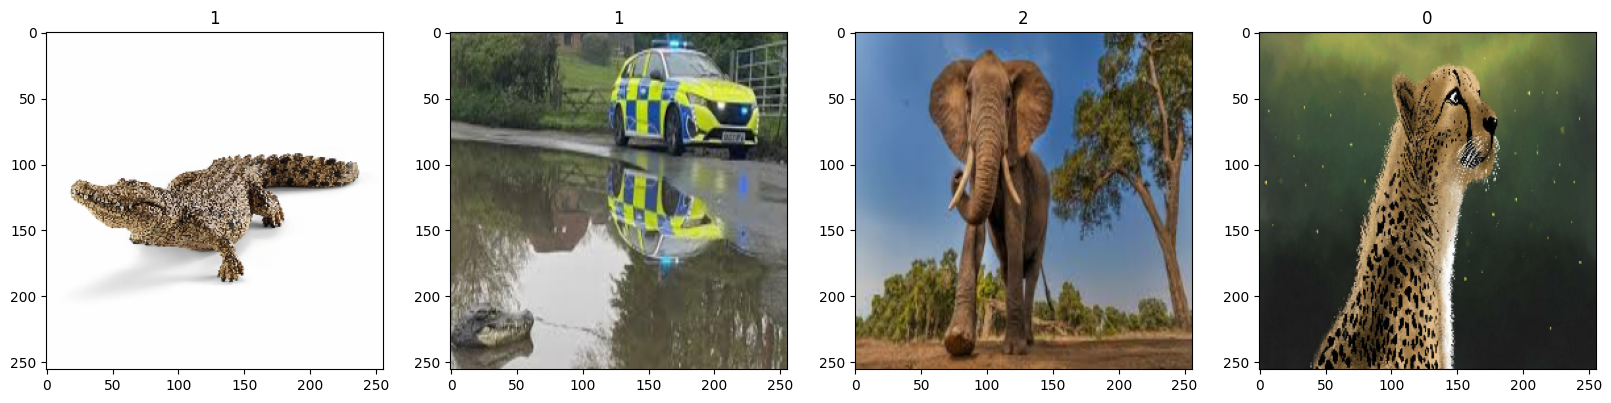

In [17]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

**Q.3** Map the data such that all pixel values lie between 0 and 1 using the **lambda function**

In [18]:
data=data.map(
    #Your code here
    lambda x,y: (x/255,y)
)

**Q.4** Split the data into train set and test set(and validation set if needed) using **data.take**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-class-take-method/) and **data.skip**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-skip-method/)

In [19]:
#Your code here
#split data into test and train
total_batches = tf.data.experimental.cardinality(data).numpy()
train_size = int(total_batches * 0.8)

# Split the dataset
train = data.take(train_size)
test = data.skip(train_size)




**Creating the model**

**Q.5** Write code to create CNN model including fully connected layers with softmax as final layer.

In [20]:
model=Sequential([
    #Your code here
    Conv2D(16,(3,3),1,activation='relu'),
    MaxPooling2D(),
    Conv2D(32,(3,3),1,activation='relu'),
    MaxPooling2D(),
    Conv2D(16,(3,3),1,activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(256,activation='relu'),
    Dense(4,activation='softmax')
])


**Q.6** Compile your model

In [21]:
model.compile(
    #Your code here
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

**Q.7** Fit your model with train set and make sure to keep **less epochs**(10-15) as the dataset size is very large.

In [22]:
model.fit(
    #Your code here
    train,
    epochs=12,

)

Epoch 1/12
41/41 [==============================] - 257s 6s/step - loss: 1.4983 - accuracy: 0.3133
Epoch 2/12
41/41 [==============================] - 13s 263ms/step - loss: 1.2491 - accuracy: 0.4291
Epoch 3/12
41/41 [==============================] - 13s 275ms/step - loss: 0.9200 - accuracy: 0.6410
Epoch 4/12
41/41 [==============================] - 13s 273ms/step - loss: 0.6972 - accuracy: 0.7416
Epoch 5/12
41/41 [==============================] - 13s 246ms/step - loss: 0.4530 - accuracy: 0.8514
Epoch 6/12
41/41 [==============================] - 13s 266ms/step - loss: 0.2325 - accuracy: 0.9345
Epoch 7/12
41/41 [==============================] - 13s 261ms/step - loss: 0.1438 - accuracy: 0.9550
Epoch 8/12
41/41 [==============================] - 13s 262ms/step - loss: 0.0884 - accuracy: 0.9726
Epoch 9/12
41/41 [==============================] - 13s 267ms/step - loss: 0.0764 - accuracy: 0.9809
Epoch 10/12
41/41 [==============================] - 13s 263ms/step - loss: 0.0470 - accuracy

**Q.8** Test your code with test set

In [23]:
loss,accuracy=model.evaluate(
    #Your code here
    test
)

11/11 [==============================] - 28s 1s/step - loss: 0.5118 - accuracy: 0.9014


In [24]:
# Do not change this code
if accuracy>=0.85:
  print(f"Congratulations, CNN assignment complete!! Your accuracy is {accuracy}")
else:
  print(f"Try again, not enough accuracy! Your accuracy is {accuracy}" )

Congratulations, CNN assignment complete!! Your accuracy is 0.9014492630958557


**Note: 1. Many of you will get very high train accuracy but low test accuracy. This is called overfitting, this can be solved by increasing the train set size. If your getting low accuracy for both train and test, modify your layers in the model.**

**2.Do use T4GPU.Ideally your first epoch will take quite sometime and rest of the epochs will be faster but if all your epochs are taking a lot of time, try starting a new gpu session(open a new gmail account and open colab on that) because your free gpu might have exhausted itself.**

**3.Other than that everything should be fine, happy learning!!**